# Project 1 : General EDA


In [1]:
# 1. Dataset Selection
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv file
df = pd.read_csv('Global Superstore.csv', encoding='ISO-8859-1')

In [3]:
# displays size, info and first 4 columns of dataset
df_info = df.info()
df_shape = df.shape
df_head = df.head()
df_shape, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿Row ID       51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

((51290, 24),
    ï»¿Row ID         Order ID  Order Date   Ship Date     Ship Mode  \
 0      32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day   
 1      26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class   
 2      25330    IN-2013-71249  17-10-2013  18-10-2013   First Class   
 3      13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class   
 4      47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day   
 
   Customer ID     Customer Name      Segment           City            State  \
 0    RH-19495       Rick Hansen     Consumer  New York City         New York   
 1    JR-16210     Justin Ritter    Corporate     Wollongong  New South Wales   
 2    CR-12730      Craig Reiter     Consumer       Brisbane       Queensland   
 3    KM-16375  Katherine Murray  Home Office         Berlin           Berlin   
 4     RH-9495       Rick Hansen     Consumer          Dakar            Dakar   
 
    ...        Product ID    Category Sub-Category  \
 0  ...   

In [4]:
# 2. Task to perform
# Cleaning Data

# Step 1: Fix column names
df.rename(columns={df.columns[0]: "Row ID"}, inplace=True)

# Step 2: Remove duplicates
df = df.drop_duplicates()

# Step 3: Handle missing values
# Postal Code is the only column with missing values and it's not essential for analysis, so we drop it
df.drop(columns=["Postal Code"], inplace=True)

# Step 4: Convert Order Date and Ship Date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors='coerce')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True, errors='coerce')

# Step 5: Detect and handle outliers using IQR for relevant numeric columns
numeric_cols = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply outlier removal for each column
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

# Final cleaned data shape
df.shape


(30881, 23)

In [5]:
# shows if duplicated values present in dataframe
df.duplicated()

12068    False
12069    False
12073    False
12074    False
12078    False
         ...  
51284    False
51285    False
51287    False
51288    False
51289    False
Length: 30881, dtype: bool

In [6]:
# sum of duplicated values in dataframe
df.duplicated().sum()

0

In [7]:
# Missing values in each column
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [8]:
# Total missing values
df.isnull().sum().sum()

0

In [9]:
# displays columns present in dataframe
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [10]:
# Correlation between sales and profit
correlation_matrix = df[['Sales', 'Profit']].corr()
print(correlation_matrix)


           Sales    Profit
Sales   1.000000  0.426757
Profit  0.426757  1.000000


In [11]:
# 3. Statistical Analysis

# Step 1: Statistical Summary
summary_stats = df[["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]].describe()

summary_stats


,Sales,Quantity,Discount,Profit,Shipping Cost
count,30881.000000,30881.000000,30881.000000,30881.000000,30881.000000
mean,72.596522,2.849778,0.090765,11.279341,6.524549
std,72.288147,1.600580,0.148773,17.419509,6.073616
min,0.990000,1.000000,0.000000,-38.250000,0.002000
25%,23.520000,2.000000,0.000000,1.860000,1.910000
50%,48.660000,2.000000,0.000000,7.537100,4.386000
75%,97.680000,4.000000,0.200000,18.893700,9.310000
max,575.880000,7.000000,0.500000,68.280000,26.420000


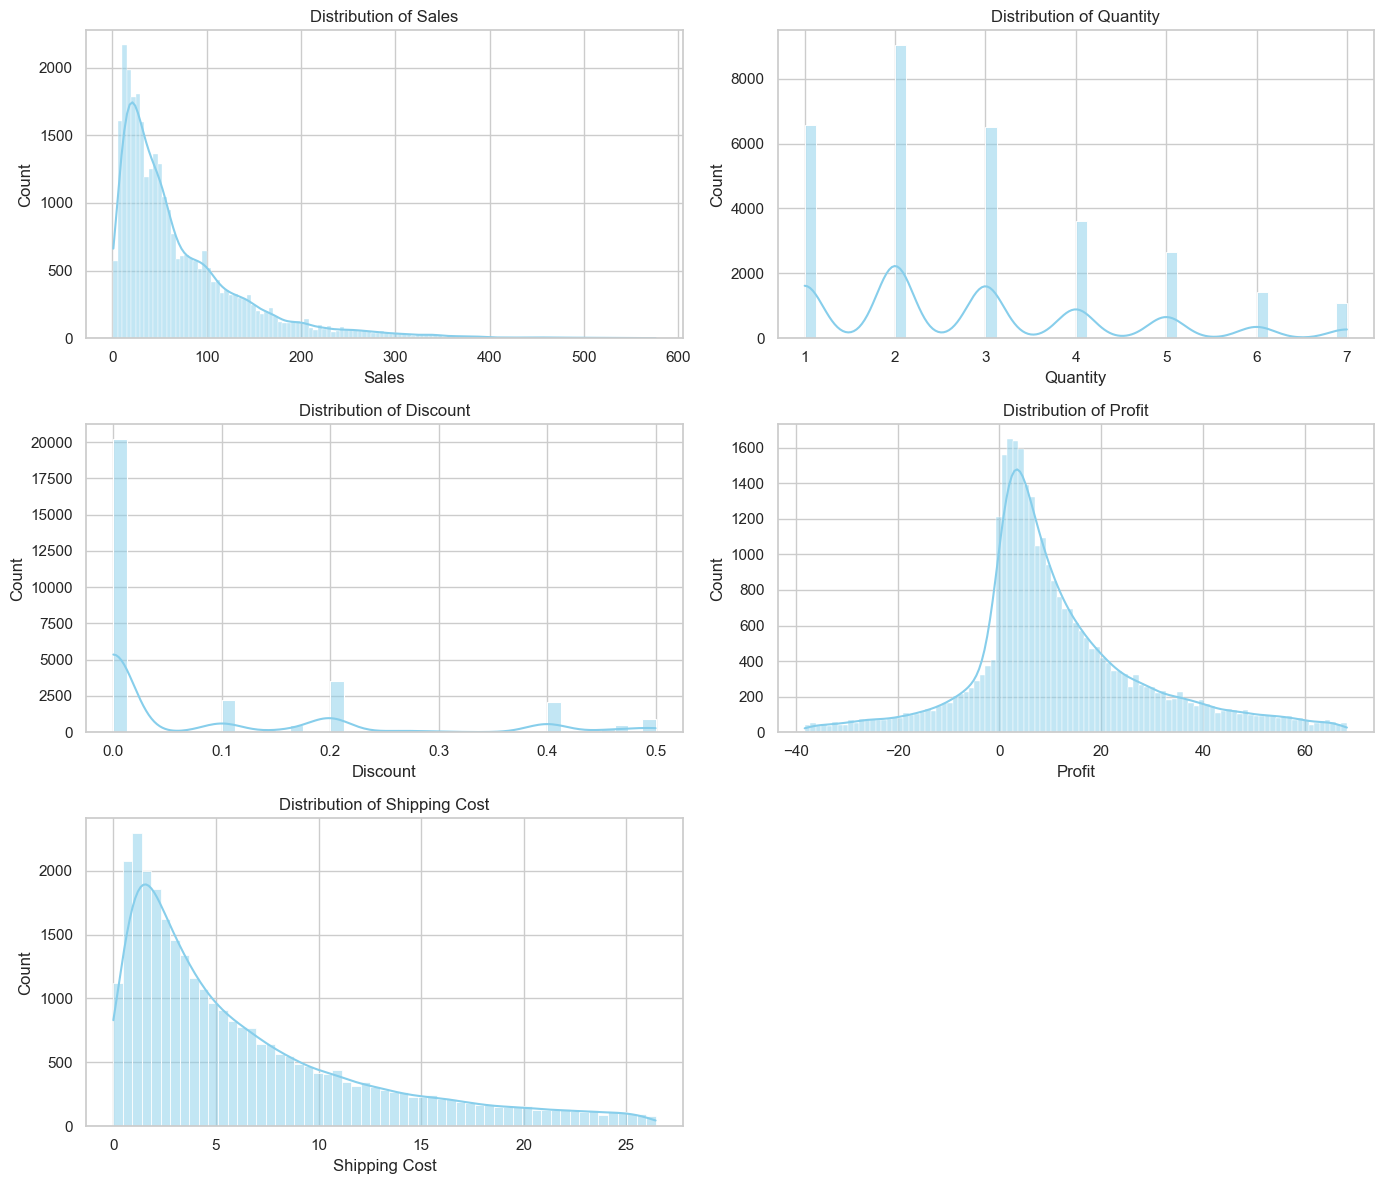

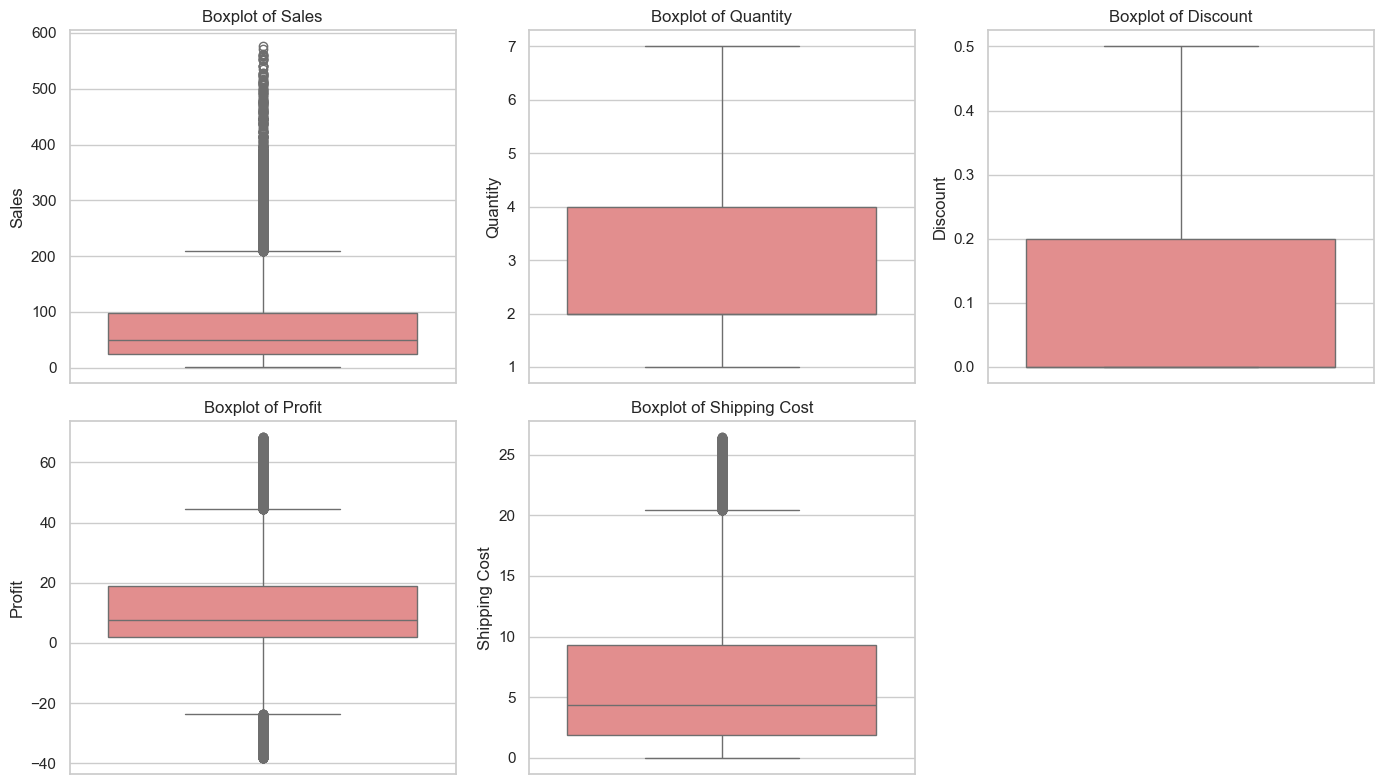

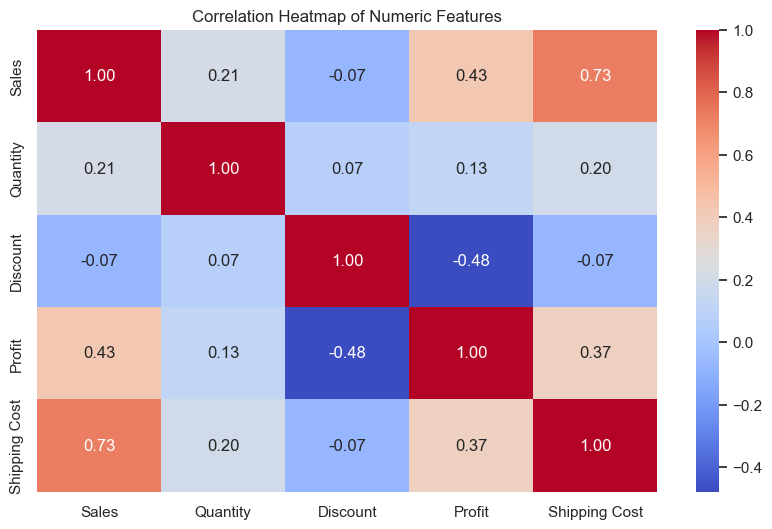

In [12]:
#4. Data Visualization

# Set plot style
sns.set(style="whitegrid")

# Histograms
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col}')

# Hide any unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(14, 8))
numeric_cols = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]
for idx, col in enumerate(numeric_cols):
    plt.subplot(2, 3, idx + 1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
